# Final Project - Reinforcements Learning
Hello dear students,<br> this is the template notebook. Please click on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1: Avraham Raviv, 204355390
<br>
Student 2: Yevgeni Berkovitch, 317079234
<br><br>
<img src="https://play-lh.googleusercontent.com/e_oKlKPISbgdzut1H9opevS7-LTB8-8lsmpCdMkhlnqFenZhpjxbLmx7l158-xQQCIY">

### https://github.com/mpSchrader/gym-sokoban

# Installs

In [ ]:
%%capture
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install gym
!pip install pygame
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install gym_sokoban
!git clone https://github.com/avivg7/sokoban-so.git
!unzip /content/sokoban-so/Compress.zip

# Imports

In [ ]:
import random
import time
import os

import numpy as np
import matplotlib.pyplot as plt

import base64
import imageio
import IPython
from pyvirtualdisplay import Display
from IPython.display import HTML
import pyvirtualdisplay

import gym
from gym import error, spaces, utils
from soko_pap import *

from collections import deque, defaultdict
from queue import PriorityQueue

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from moviepy.editor import *
import gdown
from base64 import b64encode

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2760704/45929032 bytes (6.0%)6250496/45929032 bytes (13.6%)9560064/45929032 bytes (20.8%)13049856/45929032 bytes (28.4%)16547840/45929032 bytes (36.0%)20152320/45929032 bytes (43.9%)23568384/45929032 bytes (51.3%)27033600/45929032 bytes (58.9%)30638080/45929032 bytes (66.7%)33996800/45929032 bytes (74.0%)37576704/45929032 bytes (81.8%)41107456/45929032 bytes (89.5%)

  from scipy.ndimage.filters import sobel

  from collections import Mapping



In [ ]:
# load models
!gdown https://drive.google.com/drive/u/0/folders/1sET8SWshtBvBOgRcVcp3J5VFtLkluVQp --folder

Retrieving folder list
Processing file 1iRyV-o2Q_qV9N-qETp2cAw9EBHUbG6Gt Q2_end.h5
Processing file 1WwO_EROjCjIhiZRuNnhiVNTQnOw64KvY Q2_half.h5
Processing file 1d3mOEoL7JiP8su54oqrnvxHTMs9TlO3A Q3_end.h5
Processing file 1TZJY6GuWAM9tonje8tdtBIQDKtud_qIU Q3_half.h5
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1iRyV-o2Q_qV9N-qETp2cAw9EBHUbG6Gt
To: /content/models/Q2_end.h5
100% 3.69M/3.69M [00:00<00:00, 113MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WwO_EROjCjIhiZRuNnhiVNTQnOw64KvY
To: /content/models/Q2_half.h5
100% 3.69M/3.69M [00:00<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/uc?id=1d3mOEoL7JiP8su54oqrnvxHTMs9TlO3A
To: /content/models/Q3_end.h5
100% 2.16M/2.16M [00:00<00:00, 94.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TZJY6GuWAM9tonje8tdtBIQDKtud_qIU
To: /content/models/Q3_half.h5
100% 2.16M/2.16M [00:00<00:00, 57.9MB/s]
Downlo

# Display utils
The cell below contains the video display configuration. No need to make changes here.

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# EX2 - PUSH & PULL - ONE BOX

In [ ]:
#=============== DO NOT DELETE ===============
sok_2 = PushAndPullSokobanEnv(dim_room=(7, 7),num_boxes=1 ,max_steps=500)
# ============================================

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



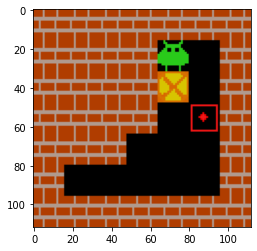

In [ ]:
screen = sok_2.render(mode='rgb_array')
plt.imshow(sok_2.render('rgb_array'))
observation, reward, done, _ = sok_2.step(1)
# print_env_det(sok_2)

## Utils

In [ ]:
def get_distances(room_state):
    for i in range(room_state.shape[0]):
        for j in range(room_state.shape[1]):
            if room_state[i][j] == 2:
                target = (i, j)

    distances = np.zeros(shape=room_state.shape)
    visited_cells = set()
    cell_queue = deque()

    visited_cells.add(target)
    cell_queue.appendleft(target)

    while len(cell_queue) != 0:
        cell = cell_queue.pop()
        distance = distances[cell[0]][cell[1]]
        for x,y in ((1,0), (-1,-0), (0,1), (0,-1)):
            next_cell_x, next_cell_y = cell[0]+x, cell[1]+y
            if room_state[next_cell_x][next_cell_y] != 0 and not (next_cell_x, next_cell_y) in visited_cells:
                distances[next_cell_x][next_cell_y] = distance + 1
                visited_cells.add((next_cell_x, next_cell_y))
                cell_queue.appendleft((next_cell_x, next_cell_y))

    return distances

def calc_distances(room_state, distances):
    box = None
    mover = None
    for i in range(room_state.shape[0]):
        for j in range(room_state.shape[1]):
            if room_state[i][j] == 4:
                box = (i,j)

            if room_state[i][j] == 5:
                mover = (i,j)

    return mover, box, distances[box[0]][box[1]]

def box2target_change_reward(room_state, next_room_state, distances):
    if np.array_equal(room_state, next_room_state):
        return -1.0

    mover, box, t2b = calc_distances(room_state, distances)
    n_mover, n_box, n_t2b = calc_distances(next_room_state, distances)

    change_reward = 0.0
    if n_t2b < t2b:
        change_reward += 5.0
    elif n_t2b > t2b:
        change_reward -= 5.0

    m2b = np.sqrt((mover[0]-box[0])**2 + (mover[1]-box[1])**2)
    n_m2b = np.sqrt((n_mover[0]-n_box[0])**2 + (n_mover[1]-n_box[1])**2)

    if n_m2b < m2b and m2b >= 2:
        change_reward += 1.0
    elif n_m2b > m2b and n_m2b >= 2:
        change_reward -= 1.0

    return change_reward

## Solution

In [ ]:
class SOK_Agent:
    def __init__(self):
        # Construct DQN models
        self.state_size = (112,112,1)
        self.action_size = 8
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.batch_size = 8

        # Replay buffers
        self.replay_buffer = deque(maxlen=5000)
        self.prioritized_replay_buffer = deque(maxlen=500)

        # Hyperparameters
        self.gamma = 0.9
        self.epsilon = 1.0
        self.epsilon_min = 0.3
        self.epsilon_decay = 0.995
        self.replay_rate = 10
        self.update_beta = 0.999

        self.action_rotation_map = {
            0: 2,
            1: 3,
            2: 1,
            3: 0,
            4: 6,
            5: 7,
            6: 5,
            7: 4
        }

    def _build_model(self):
        model = Sequential()
        model.add(Conv2D(32, (16,16), strides=(16,16), input_shape=self.state_size, activation='relu'))
        model.add(Conv2D(64, (3,3), activation='relu'))
        model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))

        lr_schedule = ExponentialDecay(0.001, decay_steps=2000, decay_rate=0.95, staircase=False)
        model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.append([state, action, reward, next_state, done])

    def copy_to_prioritized_buffer(self, n):
        for i in range(n):
            self.prioritized_replay_buffer.append(self.replay_buffer[-1-i])

    def act(self, state, stochastic=False):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)

        act_values = self.model.predict(state, verbose=0)[0]

        if stochastic:
            act_probs = np.exp(act_values)/np.exp(act_values).sum()
            return np.random.choice(np.arange(self.action_size), size=1, p=act_probs)[0]

        return np.argmax(act_values)

    def replay(self):
        if len(self.replay_buffer) < self.batch_size:
            return

        if len(self.prioritized_replay_buffer) < self.batch_size//2:
            minibatch = random.sample(self.replay_buffer, self.batch_size)
        else:
            minibatch = random.sample(self.replay_buffer, self.batch_size//2)
            minibatch.extend(random.sample(self.prioritized_replay_buffer, self.batch_size//2))

        states = np.zeros((self.batch_size*4, self.state_size[0], self.state_size[1]))
        actions = np.zeros(self.batch_size*4, dtype=int)
        rewards = np.zeros(self.batch_size*4)
        next_states = np.zeros((self.batch_size*4, self.state_size[0], self.state_size[1]))
        statuses = np.zeros(self.batch_size*4)
        targets = np.zeros((self.batch_size*4, self.action_size))

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            for rot in range(4):
                ind = i*4+rot
                if rot != 0:
                    state = np.rot90(state, axes=(1,2))
                    next_state = np.rot90(next_state, axes=(1,2))
                    action = self.action_rotation_map.get(action)

                states[ind] = state.copy()
                actions[ind] = action
                rewards[ind] = reward
                next_states[ind] = next_state.copy()
                statuses[ind] = 1 if done else 0

        targets = self.model.predict(states, verbose=0)
        max_actions = np.argmax(self.model.predict(next_states, verbose=0), axis=1)
        next_rewards = self.target_model.predict(next_states, verbose=0)

        ind = 0
        for action, reward, next_reward, max_action, done in zip(actions, rewards, next_rewards, max_actions, statuses):
            if not done:
                reward += self.gamma * next_reward[max_action]
            targets[ind][action] = reward
            ind += 1

        self.model.fit(states, targets, epochs=10, verbose=0)

        self.update_target_model()

        if self.epsilon > self.epsilon_min:
            self.epsilon = self.epsilon * self.epsilon_decay

    def update_target_model(self):
        model_w = self.model.get_weights()
        target_model_w = self.target_model.get_weights()
        updated_target_model_w = []
        for i in range(len(model_w)):
            updated_target_model_w.append(self.update_beta*target_model_w[i] + (1-self.update_beta)*model_w[i])
        self.target_model.set_weights(updated_target_model_w)

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [ ]:
def process_frame(frame):
    f = frame.mean(axis=2)
    f = f / 255
    return np.expand_dims(f, axis=0)

## Training and Testing

#### Test Suite

In [ ]:
def test_agent(e, cur_record, stochastic=False):
    current_epsilon = agent.epsilon
    agent.epsilon = 0.0
    num_solved = 0
    solved_in_steps = defaultdict(int)

    for t in range(100):
        random.seed(t)
        sok = PushAndPullSokobanEnv(dim_room=(7, 7), num_boxes=1)
        sok.set_maxsteps(20)
        steps = 0

        state = sok.get_image('rgb_array')
        done = False
        while not done:
            steps += 1
            action = agent.act(process_frame(state), stochastic)
            if action < 4:
                action += 1
            else:
                action += 5
            state, reward, done, info = sok.step(action)

        if 3 in sok.room_state:
            num_solved += 1
            solved_in_steps[steps] += 1

    agent.epsilon = current_epsilon

    if num_solved > cur_record:
       agent.save(f"models/Q2_{num_solved}_{e}.h5")
       cur_record = num_solved

    print("Solved: %d" % num_solved)
    print("=" * 30)
    print(solved_in_steps)
    print("*" * 30)

    return num_solved, cur_record

In [ ]:
max_episodes = 50000
max_steps = 20

def init_sok(r):
    random.seed(r+100)
    sok = PushAndPullSokobanEnv(dim_room=(7, 7), num_boxes=1)
    sok.set_maxsteps(max_steps)
    return sok

agent = SOK_Agent()

### Testing our learned models


#### In the middle

In [ ]:
agent.load('models/Q2_half.h5')
test_agent(0, 0)

Solved: 64
defaultdict(<class 'int'>, {3: 25, 1: 21, 6: 2, 2: 11, 5: 5})
******************************


(64, 64)

In [ ]:
tests = [3, 14, 49, 65]

sok = init_sok(-100 + tests[0])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=1) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

  self._proc.stdin.write(im.tostring())



In [ ]:
sok = init_sok(-100 + tests[1])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=2) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[2])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[3])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

#### At the end

In [ ]:
agent.load('models/Q2_end.h5')
test_agent(0, 0)

Solved: 96
defaultdict(<class 'int'>, {3: 25, 9: 2, 1: 21, 7: 4, 6: 10, 2: 11, 5: 15, 8: 3, 4: 3, 11: 2})
******************************


(96, 96)

In [ ]:
tests = [49, 65, 95]

sok = init_sok(-100 + tests[0])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[1])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[2])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

### Training from scratch

In [ ]:
running_puzzles = 0
running_solved = 0
record = 0
solved_tests = []

for e in range(max_episodes):
    sok = init_sok(e)
    random.seed(e)
    running_puzzles += 1

    state = process_frame(sok.get_image('rgb_array'))
    room_state = sok.room_state.copy()
    distances = get_distances(room_state)

    for step in range(sok.max_steps):
        action = agent.act(state)
        if action < 4:
            next_state, reward, done, _ = sok.step(action+1)
        else:
            next_state, reward, done, _ = sok.step(action+5)

        next_state = process_frame(next_state)
        next_room_state = sok.room_state

        if not done:
            reward += box2target_change_reward(room_state, next_room_state, distances)

        agent.remember(state, action, reward, next_state, done)

        state = next_state.copy()
        room_state = next_room_state.copy()

        if (step+1) % agent.replay_rate == 0:
            agent.replay()

        if done:
            if 3 in sok.room_state:
                agent.copy_to_prioritized_buffer(step+1)
                running_solved += 1

            if (e+1) % 20 == 0 and e > 0:
                print(f"{running_solved} | {running_puzzles}")

                if (e+1) % 100 == 0:
                    running_puzzles = 0
                    running_solved = 0

            break

    if (e+1) % 100 == 0 and e > 0:
        num_solved, record = test_agent(e, record, stochastic=False)
        solved_tests.append(num_solved)

## EX3 - PUSH & PULL - TWO BOXES

In [ ]:
#=============== DO NOT DELETE ===============
sok_3 = PushAndPullSokobanEnv(dim_room=(7, 7),num_boxes=2 ,max_steps=500)
# ============================================

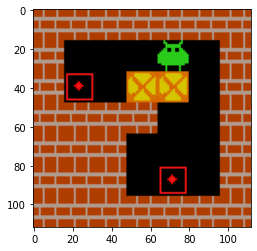

In [ ]:
screen = sok_3.render(mode='rgb_array')
plt.imshow(sok_3.render('rgb_array'))
# print_env_det(sok_3)

## Utils

In [ ]:
def get_distances_for_target(room_state, target):
    distances = np.zeros(shape=room_state.shape)
    visited_cells = set()
    cell_queue = deque()

    visited_cells.add(target)
    cell_queue.appendleft(target)

    while len(cell_queue) != 0:
        cell = cell_queue.pop()
        distance = distances[cell[0]][cell[1]]
        for x,y in ((1,0), (-1,-0), (0,1), (0,-1)):
            next_cell_x, next_cell_y = cell[0]+x, cell[1]+y
            if room_state[next_cell_x][next_cell_y] != 0 and not (next_cell_x, next_cell_y) in visited_cells:
                distances[next_cell_x][next_cell_y] = distance + 1
                visited_cells.add((next_cell_x, next_cell_y))
                cell_queue.appendleft((next_cell_x, next_cell_y))

    return distances

def get_maze_info(room_state):
    targets = []
    for i in range(room_state.shape[0]):
        for j in range(room_state.shape[1]):
            if room_state[i][j] == 2:
                targets.append((i, j))

    distances0 = get_distances_for_target(room_state, targets[0])
    distances1 = get_distances_for_target(room_state, targets[1])
    common_distances = np.minimum(distances0, distances1)

    maze_info = {}
    maze_info['target0'] = targets[0]
    maze_info['target1'] = targets[1]
    maze_info['distances0'] = distances0
    maze_info['distances1'] = distances1
    maze_info['common_distances'] = common_distances
    return maze_info

def calc_distances(room_state, distances):
    boxes = []
    for i in range(room_state.shape[0]):
        for j in range(room_state.shape[1]):
            if room_state[i][j] == 4:
                boxes.append((i,j))
    if len(boxes) == 2:
        return distances[boxes[0][0]][boxes[0][1]] + distances[boxes[1][0]][boxes[1][1]]

    return distances[boxes[0][0]][boxes[0][1]]

def box2target_change_reward(room_state, next_room_state, maze_info):
    if np.array_equal(room_state, next_room_state):
        return -5.0

    target0 = maze_info['target0']
    target1 = maze_info['target1']
    distances0 = maze_info['distances0']
    distances1 = maze_info['distances1']
    common_distances = maze_info['common_distances']

    relevant_distances = common_distances

    if room_state[target0[0]][target0[1]] == 3:
        relevant_distances = distances1
    elif room_state[target1[0]][target1[1]] == 3:
        relevant_distances = distances0

    change_reward = 0.0
    t2b = calc_distances(room_state, relevant_distances)
    n_t2b = calc_distances(next_room_state, relevant_distances)
    if n_t2b < t2b:
        change_reward += 5.0
    elif n_t2b > t2b:
        change_reward -= 5.0

    return change_reward

## Solution

In [ ]:
class SOK_Agent:
    def __init__(self):
        # Construct DQN models
        self.state_size = (112,112,1)
        self.action_size = 8
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.batch_size = 8

        # Replay buffers
        self.replay_buffer = deque(maxlen=5000)
        self.prioritized_replay_buffer = deque(maxlen=1000)

        # Hyperparameters
        self.gamma = 0.9
        self.epsilon = 1.0
        self.epsilon_min = 0.2
        self.epsilon_decay = 0.9995
        self.replay_rate = 10
        self.update_beta = 0.999

        self.action_rotation_map = {
            0: 2,
            1: 3,
            2: 1,
            3: 0,
            4: 6,
            5: 7,
            6: 5,
            7: 4
        }

    def _build_model(self):
        model = Sequential()
        model.add(Conv2D(32, (16, 16), strides=(16, 16), input_shape=self.state_size, activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))

        lr_schedule = ExponentialDecay(0.001, decay_steps=2000, decay_rate=0.99, staircase=False)
        model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.append([state, action, reward, next_state, done])

    def copy_to_prioritized_buffer(self, n):
        for i in range(n):
            self.prioritized_replay_buffer.append(self.replay_buffer[-1-i])

    def act(self, state, stochastic=False):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)

        act_values = self.model.predict(state, verbose=0)[0]

        if stochastic:
            act_probs = np.exp(act_values)/np.exp(act_values).sum()
            return np.random.choice(np.arange(self.action_size), size=1, p=act_probs)[0]

        return np.argmax(act_values)

    def replay(self):
        if len(self.replay_buffer) < self.batch_size:
            return

        if len(self.prioritized_replay_buffer) < self.batch_size//2:
            minibatch = random.sample(self.replay_buffer, self.batch_size)
        else:
            minibatch = random.sample(self.replay_buffer, self.batch_size//2)
            minibatch.extend(random.sample(self.prioritized_replay_buffer, self.batch_size//2))

        states = np.zeros((self.batch_size*4, self.state_size[0], self.state_size[1]))
        actions = np.zeros(self.batch_size*4, dtype=int)
        rewards = np.zeros(self.batch_size*4)
        next_states = np.zeros((self.batch_size*4, self.state_size[0], self.state_size[1]))
        statuses = np.zeros(self.batch_size*4)
        targets = np.zeros((self.batch_size*4, self.action_size))

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            for rot in range(4):
                ind = i*4+rot
                if rot != 0:
                    state = np.rot90(state, axes=(1,2))
                    next_state = np.rot90(next_state, axes=(1,2))
                    action = self.action_rotation_map.get(action)

                states[ind] = state.copy()
                actions[ind] = action
                rewards[ind] = reward
                next_states[ind] = next_state.copy()
                statuses[ind] = 1 if done else 0

        targets = self.model.predict(states)
        max_actions = np.argmax(self.model.predict(next_states), axis=1)
        next_rewards = self.target_model.predict(next_states)

        ind = 0
        for action, reward, next_reward, max_action, done in zip(actions, rewards, next_rewards, max_actions, statuses):
            if not done:
                reward += self.gamma * next_reward[max_action]
            targets[ind][action] = reward
            ind += 1

        self.model.fit(states, targets, epochs=10, verbose=0)

        self.update_target_model()

        if self.epsilon > self.epsilon_min:
            self.epsilon = self.epsilon * self.epsilon_decay

    def update_target_model(self):
        model_w = self.model.get_weights()
        target_model_w = self.target_model.get_weights()
        updated_target_model_w = []
        for i in range(len(model_w)):
            updated_target_model_w.append(self.update_beta*target_model_w[i] + (1-self.update_beta)*model_w[i])
        self.target_model.set_weights(updated_target_model_w)

    def load(self, name):
        self.model.load_weights(name)
        self.target_model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [ ]:
def process_frame(frame):
    f = frame.mean(axis=2)
    f = f / 255
    return np.expand_dims(f, axis=0)

## Training and Testing

#### Test Suite

In [ ]:
agent = SOK_Agent()

max_episodes = 50000
max_steps = 30

def init_sok(r):
    random.seed(r)
    sok = PushAndPullSokobanEnv(dim_room=(7, 7), num_boxes=2)
    sok.set_maxsteps(max_steps)
    return sok

In [ ]:
def test_agent(e, cur_record, stochastic=False):

    current_epsilon = agent.epsilon
    agent.epsilon = 0.0
    num_solved = 0
    solved_in_steps = defaultdict(int)

    for t in range(100):
        sok = init_sok(t)
        sok.set_maxsteps(max_steps)
        steps = 0

        state = sok.get_image('rgb_array')
        done = False
        while not done:
            steps += 1
            action = agent.act(process_frame(state), stochastic)
            if action < 4:
                action += 1
            else:
                action += 5
            state, reward, done, info = sok.step(action)

        if sok.boxes_on_target == 2:
            num_solved += 1
            solved_in_steps[steps] += 1

    agent.epsilon = current_epsilon

    if num_solved > cur_record:
       agent.save(f"models/Q3_{num_solved}_{e}.h5")
       cur_record = num_solved

    print("Solved: %d" % num_solved)
    print("=" * 30)
    print(solved_in_steps)
    print("*" * 30)

    return num_solved, cur_record

### Testing our learned models

#### In the middle

In [ ]:
agent.load('models/Q3_half.h5')
test_agent(0, 0)

[SOKOBAN] Runtime Error/Warning: Not enough free spots (#3) to place 1 player and 2 boxes.
[SOKOBAN] Retry . . .
Solved: 21
defaultdict(<class 'int'>, {5: 2, 4: 8, 3: 7, 6: 4})
******************************


(21, 21)

In [ ]:
tests = [0, 3, 15, 89]

sok = init_sok(-100 + tests[0])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[1])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[2])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

#### At the end

In [ ]:
agent.load('models/Q3_end.h5')
test_agent(0, 0)

[SOKOBAN] Runtime Error/Warning: Not enough free spots (#3) to place 1 player and 2 boxes.
[SOKOBAN] Retry . . .
Solved: 73
defaultdict(<class 'int'>, {11: 2, 6: 12, 5: 5, 10: 8, 4: 10, 14: 2, 16: 1, 12: 4, 3: 8, 7: 5, 13: 2, 25: 1, 9: 7, 8: 3, 15: 2, 18: 1})
******************************


(73, 73)

In [ ]:
tests = [0, 3, 15, 89]

sok = init_sok(-100 + tests[0])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[1])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

In [ ]:
sok = init_sok(-100 + tests[2])
sok.epsilon = 0
agent.epsilon = 0
start_time = time.time()
done = False
iter = 0
video_filename = 'imageio.mp4'

state = sok.get_image('rgb_array')

with imageio.get_writer(video_filename, fps=3) as video:
    video.append_data(sok.render(mode='rgb_array'))
    while (iter < 10) or not done:
        time_passed = int(time.time() - start_time)
        if done or time_passed > 3:
            break
        iter +=1
        action = agent.act(process_frame(state))

        if action < 4:
            action += 1
        else:
            action += 5

        state, reward, done, info = sok.step(action)
        video.append_data(sok.render(mode='rgb_array'))

embed_mp4(video_filename)

### Training from scratch

In [ ]:
running_puzzles = 0
running_solved = 0
solved_in_train = []
solved_in_test = []
test_record = 0

for e in range(max_episodes):
    sok = init_sok(e+100)
    random.seed(e)
    running_puzzles += 1

    state = process_frame(sok.get_image('rgb_array'))
    room_state = sok.room_state.copy()
    maze_info = get_maze_info(room_state)

    for step in range(sok.max_steps):
        action = agent.act(state, stochastic=True)
        if action < 4:
            next_state, reward, done, _ = sok.step(action+1)
        else:
            next_state, reward, done, _ = sok.step(action+5)

        next_state = process_frame(next_state)
        next_room_state = sok.room_state

        if not done:
            reward += box2target_change_reward(room_state, next_room_state, maze_info)

        agent.remember(state, action, reward, next_state, done)

        state = next_state.copy()
        room_state = next_room_state.copy()

        if e >= 200 and (step+1) % agent.replay_rate == 0:
            agent.replay()

        if done:
            if sok.boxes_on_target == 2:
                agent.copy_to_prioritized_buffer(step+1)
                running_solved += 1

            if (e+1) % 10 == 0 and e > 0:
                print(f"{running_solved} | {running_puzzles}")

                if (e+1) % 100 == 0:
                    solved_in_train.append(running_solved)
                    running_puzzles = 0
                    running_solved = 0

            break

    if (e+1) % 100 == 0 and e > 0:
        solved_tests, test_record = test_agent(e, test_record, stochastic=False)
        solved_in_test.append(solved_tests)